<a href="https://colab.research.google.com/github/KlimachyovDaniil/Parametric-Complexity/blob/main/Sampling_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.setrecursionlimit(10_000)

In [3]:
def count_compositions_number(N, R):
  numbers_dict = dict()
  numbers_dict[0] = dict()
  numbers_dict[0][0] = 1
  for i in range(1, N+1):
    numbers_dict[i] = dict()
    numbers_dict[i][0] = 1
    numbers_dict[i][i] = 1
    for j in range(1, R+1):
      numbers_dict[0][j] = 0
      if j < i:
        numbers_dict[i][j]=numbers_dict[i-1][j-1]+numbers_dict[i-1][j]
      elif j > i:
        numbers_dict[i][j] = 0
  return numbers_dict

In [4]:
compositions_dict = count_compositions_number(2500,2500)

In [5]:
def choose_ortant(n):
  return np.random.choice(np.array([-1,1]), n)

def random_composition_recursive(n, k):
    if k == 1:
        return [n]
    composition = []
    total_compositions = compositions_dict[n + k - 1][k -1]
    probs = []
    for i in range(n + 1):
        current_compositions = compositions_dict[n - i + k -2][k - 2]
        current_probability = current_compositions / total_compositions
        probs.append(current_probability)
    elem = np.random.choice([i for i in range(0, n+1)],p=probs)
    composition.append(elem)
    composition.extend(random_composition_recursive(n - elem, k - 1))
    return composition

def sample_point(n,m):
  ort = choose_ortant(n)
  composition = random_composition_recursive(m, n+1)
  return composition[:n]*ort

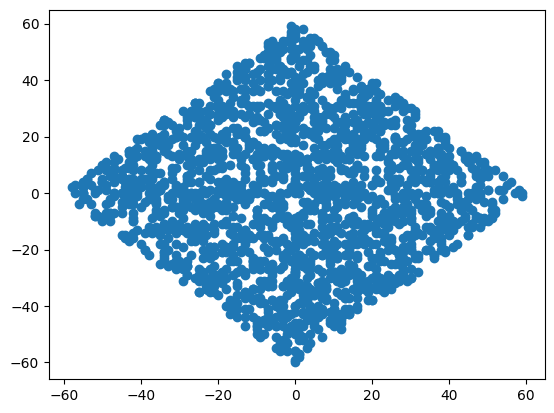

In [8]:
x = []
y = []
n, m = 2, 60
points = []
for i in range(2000):
  point = sample_point(n,m)
  x.append(point[0])
  y.append(point[1])
plt.scatter(x,y)
plt.show()